# Imports needed

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# Reading and cleaning the data

In [7]:
import io
cancer_df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [9]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


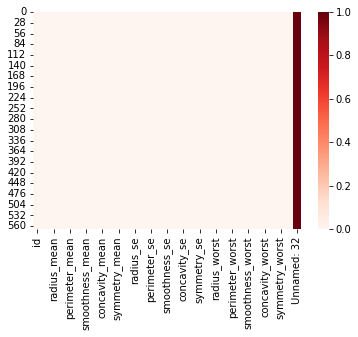

In [11]:
#Finding null values using heatmap
sns.heatmap(cancer_df.isnull(),cmap='Reds')

In [12]:
#Drop column with null values & replace diagnosis with numerical values
cancer_df.drop('Unnamed: 32',axis=1,inplace=True)
cancer_df.diagnosis = [1 if each == "M" else 0 for each in cancer_df.diagnosis]

# EDA

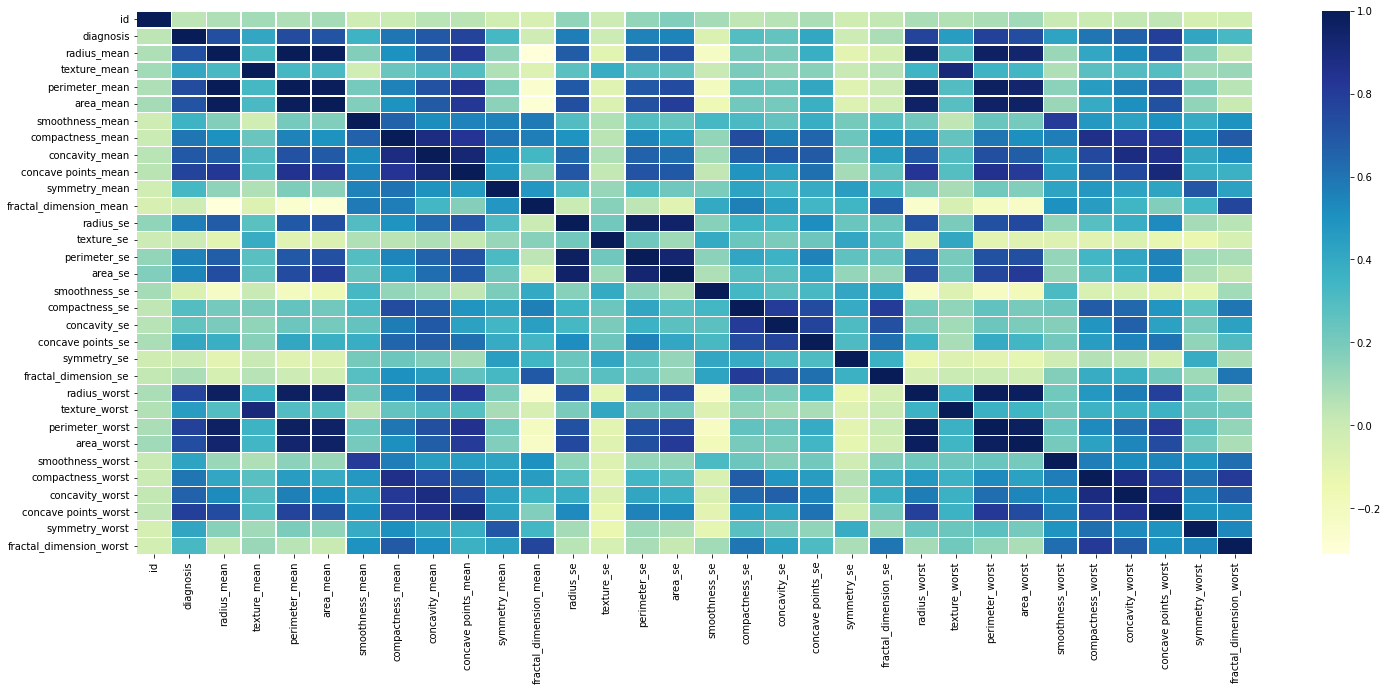

In [16]:
#Determine correlations using heatmap
plt.figure(figsize = (25, 10))
sns.heatmap(cancer_df.corr(),cmap='YlGnBu',linewidths=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


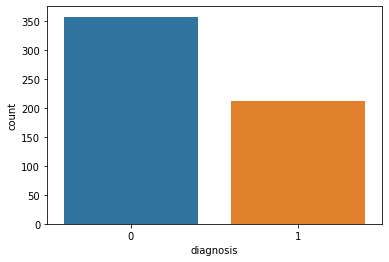

In [17]:
sns.countplot(cancer_df['diagnosis'])

# Train Test Split

In [18]:
#Choosing features and label
Features = cancer_df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

Label = cancer_df['diagnosis']

In [19]:
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# split dataset into train, test data
X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',C=1,max_iter=30,multi_class='auto')

In [25]:
lr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=30, solver='liblinear')

In [26]:
logpred = lr.predict(X_test)

In [27]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,logpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,logpred))

Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       109
           1       0.98      0.98      0.98        62

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


confusion matrix
[[108   1]
 [  1  61]]


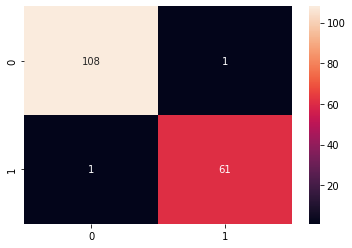

In [28]:
# fraw confusion matrix using heatmap
sns.heatmap(confusion_matrix(y_test,logpred), annot=True,fmt='g')